In [61]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


import glob

PATH = "./"
all_images = glob.glob("../../dataset/valid/*.JPG")

In [62]:
def logger(image, colour_percentage, is_varied,  path="./"):
    time_str = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    df_headers = pd.DataFrame({
        'log_time': [time_str],
        'image': [image],
        'is_varied': [is_varied],
        'variance': [colour_percentage],

    })
    df_headers.to_csv(f'{path}varied_background_logs.csv', mode='a', index=False, header=False)

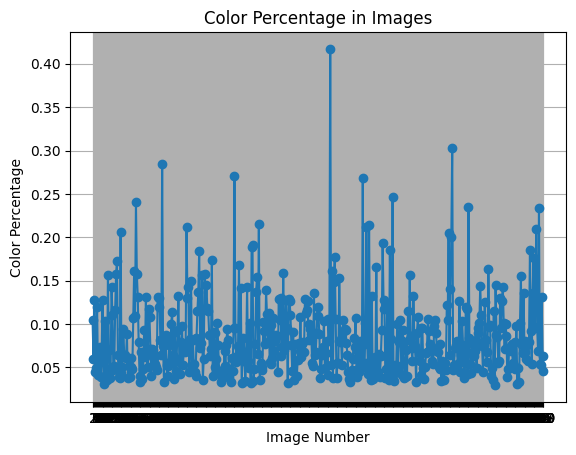

------------------COMPLETED------------------


In [63]:
color_percentages = []  # List to store color percentages

for j in range(0, int(len(all_images))):
    image_name = all_images[j]

    # Load the image
    image = cv2.imread(image_name)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding to binarize the image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Apply morphological opening to remove small objects from the background
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Apply distance transform to find the distance to the nearest background pixel for each foreground pixel
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

    # Apply thresholding to create a mask of the background region
    _, bg_mask = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, cv2.THRESH_BINARY)

    # Calculate the color histogram of the background region
    bg_pixels = image[bg_mask == 255]
    bg_hist = cv2.calcHist([bg_pixels], [0], None, [256], [0, 256])

    # Calculate the percentage of pixels that belong to the most common color
    max_color_pixels = np.max(bg_hist)
    total_pixels = bg_pixels.shape[0]
    color_percentage = max_color_pixels / total_pixels

    color_percentages.append(color_percentage)  # Add color percentage to the list

# Plot the color percentages
x_values = range(1, len(color_percentages) + 1)  # X-axis values (1, 2, 3, ...)
plt.plot(x_values, color_percentages, marker='o')

plt.xlabel('Image Number')
plt.ylabel('Color Percentage')
plt.title('Color Percentage in Images')

plt.xticks(x_values)  # Set X-axis tick labels
plt.grid(True)

plt.show()

print("------------------COMPLETED------------------")


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('varied_background_logs.csv')

# Extract the x and y values from the DataFrame
x = df['x']
y = df['y']

# Plot the line chart
plt.plot(x, y)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line Chart')

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'varied_background_logs.csv'